<a href="https://colab.research.google.com/github/aanya0207/21BCE0445_EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aanya Kumar
21BCE0445
https://github.com/aanya0207/21BCE0445_EDA

Import Libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PhDPublications.csv')

In [ ]:
print(df.head())
print(df.tail())

   rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
3         4         0    male     yes     1      1.18       3
4         5         0  female      no     0      3.75      26
     rownames  articles gender married  kids  prestige  mentor
910       911        11   male     yes     2      2.86       7
911       912        12   male     yes     1      4.29      35
912       913        12   male     yes     1      1.86       5
913       914        16   male     yes     0      1.74      21
914       915        19   male     yes     0      1.86      42


In [ ]:
print(df.describe())

         rownames    articles        kids    prestige      mentor
count  915.000000  915.000000  915.000000  915.000000  915.000000
mean   458.000000    1.692896    0.495082    3.103109    8.767213
std    264.282046    1.926069    0.764880    0.984249    9.483916
min      1.000000    0.000000    0.000000    0.755000    0.000000
25%    229.500000    0.000000    0.000000    2.260000    3.000000
50%    458.000000    1.000000    0.000000    3.150000    6.000000
75%    686.500000    2.000000    1.000000    3.920000   12.000000
max    915.000000   19.000000    3.000000    4.620000   77.000000


Data Transformation

In [ ]:
#Checking for missing values
df.isnull().sum()


,0
rownames,0
articles,0
gender,0
married,0
kids,0
prestige,0
mentor,0


In [ ]:
#Filtering Data
#a. Filter by gender:
female_df = df[df['gender'] == 'female']
print(female_df.head())

   rownames  articles  gender married  kids  prestige  mentor
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
4         5         0  female      no     0      3.75      26
5         6         0  female     yes     2      3.59       2
6         7         0  female      no     0      3.19       3


In [ ]:
#Filter by multiple conditions:
high_article_men = df[(df['gender'] == 'male') & (df['kids'] == 0)]
print(high_article_men.head())


    rownames  articles gender married  kids  prestige  mentor
0          1         0   male     yes     0      2.52       7
8          9         0   male      no     0      4.62       6
10        11         0   male      no     0      2.96      14
29        30         0   male     yes     0      2.32       3
31        32         0   male     yes     0      4.29       8


In [ ]:
#Filter by marital status
married = df[df['married'] == 'yes']
print(married.head())


   rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
3         4         0    male     yes     1      1.18       3
5         6         0  female     yes     2      3.59       2
7         8         0    male     yes     2      2.96       4
9        10         0  female     yes     0      1.25       0


In [ ]:
#Filter rows with articles greater than 1.00
high_articles = df[df['prestige'] > 1.00]
print(high_articles.head())

   rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
3         4         0    male     yes     1      1.18       3
4         5         0  female      no     0      3.75      26


In [ ]:
#Deduplication
#Check for duplicates:
duplicates = df.duplicated()
print(duplicates)


0      False
1      False
2      False
3      False
4      False
       ...  
910    False
911    False
912    False
913    False
914    False
Length: 915, dtype: bool


In [ ]:
#Remove duplicates
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print(df.head())

   rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
3         4         0    male     yes     1      1.18       3
4         5         0  female      no     0      3.75      26


In [ ]:
#Data Transformation
#a. Adding a new column (e.g., total family size = kids + 2 for parent)
df['family_size'] = df['kids'] + 2
# Changing data types
df['articles'] = df['articles'].astype(int)  # Convert articles to integer
df

,rownames,articles,gender,married,kids,prestige,mentor,family_size
0,1,0,male,yes,0,2.52,7,2
1,2,0,female,no,0,2.05,6,2
2,3,0,female,no,0,3.75,6,2
3,4,0,male,yes,1,1.18,3,3
4,5,0,female,no,0,3.75,26,2
...,...,...,...,...,...,...,...,...
910,911,11,male,yes,2,2.86,7,4
911,912,12,male,yes,1,4.29,35,3
912,913,12,male,yes,1,1.86,5,3
913,914,16,male,yes,0,1.74,21,2


In [ ]:
#Sorting and Reordering
#Sort by prestige:
df_sorted1 = df.sort_values(by='prestige', ascending=False)
df_sorted1
#b. Sort by multiple columns
df_sorted2 = df.sort_values(by=['prestige', 'articles'], ascending=[False, True])
df_sorted2

,rownames,articles,gender,married,kids,prestige,mentor,family_size
8,9,0,male,no,0,4.620,6,2
96,97,0,male,no,0,4.620,8,2
135,136,0,male,yes,2,4.620,30,4
141,142,0,female,yes,0,4.620,0,2
185,186,0,female,yes,1,4.620,15,3
...,...,...,...,...,...,...,...,...
85,86,0,male,yes,2,0.920,1,4
349,350,1,female,no,0,0.920,4,2
563,564,2,female,yes,0,0.920,0,2
11,12,0,female,no,0,0.755,13,2


In [ ]:
#Renaming Columns
df.rename(columns={'members_count': 'family-size', 'articles': 'publications'}, inplace=True)
df

,rownames,publications,gender,married,kids,prestige,mentor,family_size
0,1,0,male,yes,0,2.52,7,2
1,2,0,female,no,0,2.05,6,2
2,3,0,female,no,0,3.75,6,2
3,4,0,male,yes,1,1.18,3,3
4,5,0,female,no,0,3.75,26,2
...,...,...,...,...,...,...,...,...
910,911,11,male,yes,2,2.86,7,4
911,912,12,male,yes,1,4.29,35,3
912,913,12,male,yes,1,1.86,5,3
913,914,16,male,yes,0,1.74,21,2


In [ ]:
# Group By and Aggregation
gender_group = df.groupby('gender')['publications'].mean()
print(gender_group)


gender
female    1.470309
male      1.882591
Name: publications, dtype: float64


In [ ]:
#Group by multiple columns
grouped_data = df.groupby(['gender', 'married']).agg({
    'publications': 'sum',
    'kids': 'mean'
})
print(grouped_data)


                publications      kids
gender married                        
female no                272  0.000000
       yes               347  0.466667
male   no                220  0.000000
       yes               710  0.913386


In [ ]:
#Dropping Columns
df = df.drop(columns=['mentor'])
df

,rownames,publications,gender,married,kids,prestige,family_size
0,1,0,male,yes,0,2.52,2
1,2,0,female,no,0,2.05,2
2,3,0,female,no,0,3.75,2
3,4,0,male,yes,1,1.18,3
4,5,0,female,no,0,3.75,2
...,...,...,...,...,...,...,...
910,911,11,male,yes,2,2.86,4
911,912,12,male,yes,1,4.29,3
912,913,12,male,yes,1,1.86,3
913,914,16,male,yes,0,1.74,2


In [ ]:
#Apply custom function
def normalize_prestige(x):
    return (x - df['prestige'].min()) / (df['prestige'].max() - df['prestige'].min())

df['prestige_normalized'] = df['prestige'].apply(normalize_prestige)
print(df.head())

   rownames  publications  gender married  kids  prestige  family_size  \
0         1             0    male     yes     0      2.52            2   
1         2             0  female      no     0      2.05            2   
2         3             0  female      no     0      3.75            2   
3         4             0    male     yes     1      1.18            3   
4         5             0  female      no     0      3.75            2   

   prestige_normalized  
0             0.456662  
1             0.335058  
2             0.774903  
3             0.109961  
4             0.774903  


Binning

In [ ]:
import pandas as pd
# Example of binning the 'articles' column into 3 categories
bins = [0, 10, 20, 100]  # Define bin edges
labels = ['Low', 'Medium', 'High']  # Define labels for the bins
df['publications_binned'] = pd.cut(df['publications'], bins=bins, labels=labels, right=False)
print(df[['publications', 'publications_binned']])

     publications publications_binned
0               0                 Low
1               0                 Low
2               0                 Low
3               0                 Low
4               0                 Low
..            ...                 ...
910            11              Medium
911            12              Medium
912            12              Medium
913            16              Medium
914            19              Medium

[915 rows x 2 columns]


In [ ]:
#Discretizing the prestige Column
# Equal-width binning of the 'prestige' column into 4 bins
df['prestige_binned'] = pd.cut(df['prestige'], bins=4, labels=['Very Low', 'Low', 'High', 'Very High'])

print(df[['prestige', 'prestige_binned']])


     prestige prestige_binned
0        2.52             Low
1        2.05             Low
2        3.75       Very High
3        1.18        Very Low
4        3.75       Very High
..        ...             ...
910      2.86            High
911      4.29       Very High
912      1.86             Low
913      1.74             Low
914      1.86             Low

[915 rows x 2 columns]


In [ ]:
#Binning the kids Column
# Binning the 'kids' column into custom ranges
bins = [0, 1, 3, 5, 10]  # Define bin edges
labels = ['No Kids', 'Few Kids', 'Some Kids', 'Many Kids']  # Define labels for the bins
df['kids_binned'] = pd.cut(df['kids'], bins=bins, labels=labels, right=False)

print(df[['kids', 'kids_binned']])


     kids kids_binned
0       0     No Kids
1       0     No Kids
2       0     No Kids
3       1    Few Kids
4       0     No Kids
..    ...         ...
910     2    Few Kids
911     1    Few Kids
912     1    Few Kids
913     0     No Kids
914     0     No Kids

[915 rows x 2 columns]


In [ ]:
## Automatic binning into 5 equal-width bins for 'articles'
df['publications_auto_binned'] = pd.cut(df['publications'], bins=5)

print(df[['publications', 'publications_auto_binned']])


     publications publications_auto_binned
0               0            (-0.019, 3.8]
1               0            (-0.019, 3.8]
2               0            (-0.019, 3.8]
3               0            (-0.019, 3.8]
4               0            (-0.019, 3.8]
..            ...                      ...
910            11              (7.6, 11.4]
911            12             (11.4, 15.2]
912            12             (11.4, 15.2]
913            16             (15.2, 19.0]
914            19             (15.2, 19.0]

[915 rows x 2 columns]


In [ ]:
# Automatic quantile-based binning into 4 bins (quartiles) for 'prestige'
df['prestige_quartiles'] = pd.qcut(df['prestige'], q=4)

print(df[['prestige', 'prestige_quartiles']])


     prestige prestige_quartiles
0        2.52       (2.26, 3.15]
1        2.05      (0.754, 2.26]
2        3.75       (3.15, 3.92]
3        1.18      (0.754, 2.26]
4        3.75       (3.15, 3.92]
..        ...                ...
910      2.86       (2.26, 3.15]
911      4.29       (3.92, 4.62]
912      1.86      (0.754, 2.26]
913      1.74      (0.754, 2.26]
914      1.86      (0.754, 2.26]

[915 rows x 2 columns]


In [ ]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'articles'
Q1 = df['publications'].quantile(0.25)
Q3 = df['publications'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['publications'] < lower_bound) | (df['publications'] > upper_bound)]

print(outliers[['publications']])  # Display outliers


     publications
877             6
878             6
879             6
880             6
881             6
882             6
883             6
884             6
885             6
886             6
887             6
888             6
889             6
890             6
891             6
892             6
893             6
894             7
895             7
896             7
897             7
898             7
899             7
900             7
901             7
902             7
903             7
904             7
905             7
906             8
907             9
908             9
909            10
910            11
911            12
912            12
913            16
914            19


In [ ]:
# Remove outliers from the DataFrame
df_no_outliers = df[~((df['publications'] < lower_bound) | (df['publications'] > upper_bound))]

print(df_no_outliers[['publications']])  # Display cleaned DataFrame without outliers


     publications
0               0
1               0
2               0
3               0
4               0
..            ...
872             5
873             5
874             5
875             5
876             5

[877 rows x 1 columns]


In [ ]:
from scipy import stats

# Calculate the z-scores for the 'articles' column
df['articles_zscore'] = stats.zscore(df['publications'])

# Identify outliers with a Z-score above 3 or below -3
outliers = df[(df['articles_zscore'] > 3) | (df['articles_zscore'] < -3)]
print(outliers[['publications', 'articles_zscore']])  # Display outliers

     publications  articles_zscore
906             8         3.276390
907             9         3.795866
908             9         3.795866
909            10         4.315342
910            11         4.834819
911            12         5.354295
912            12         5.354295
913            16         7.432199
914            19         8.990628


In [ ]:
# Remove outliers from the DataFrame
df_no_outliers = df[~((df['publications'] < lower_bound) | (df['publications'] > upper_bound))]

print(df_no_outliers[['publications']])  # Display cleaned DataFrame without outliers


     publications
0               0
1               0
2               0
3               0
4               0
..            ...
872             5
873             5
874             5
875             5
876             5

[877 rows x 1 columns]


In [ ]:
# Function to calculate IQR outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Example: Detect outliers for 'kids'
outliers_kids = detect_outliers_iqr(df, 'kids')
print(outliers_kids[['kids']])  # Display outliers in 'kids' column

     kids
21      3
24      3
108     3
138     3
149     3
153     3
208     3
278     3
297     3
389     3
395     3
421     3
424     3
601     3
634     3
780     3


Data Visualizations

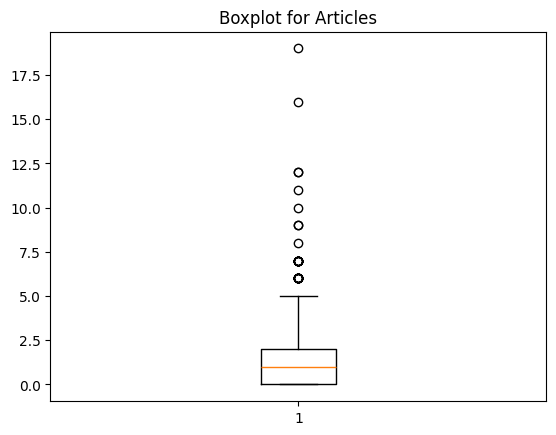

In [ ]:
import matplotlib.pyplot as plt
# Boxplot for 'articles' to visualize outliers
plt.boxplot(df['publications'])
plt.title('Boxplot for Articles')
plt.show()

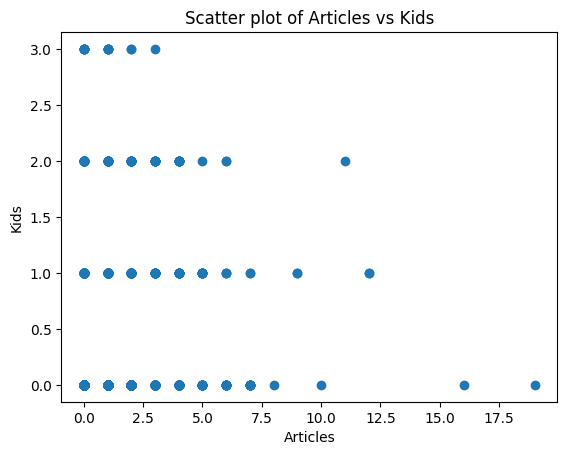

In [ ]:
# Scatter plot to visually inspect relationships and potential outliers
plt.scatter(df['publications'], df['kids'])
plt.title('Scatter plot of Articles vs Kids')
plt.xlabel('Articles')
plt.ylabel('Kids')
plt.show()


Univariate Analysis

Frequency of Gender:
gender
male      494
female    421
Name: count, dtype: int64

Frequency of Marital Status:
married
yes    606
no     309
Name: count, dtype: int64

Summary Statistics:
         rownames  publications        kids    prestige  family_size  \
count  915.000000    915.000000  915.000000  915.000000   915.000000   
mean   458.000000      1.692896    0.495082    3.103109     2.495082   
std    264.282046      1.926069    0.764880    0.984249     0.764880   
min      1.000000      0.000000    0.000000    0.755000     2.000000   
25%    229.500000      0.000000    0.000000    2.260000     2.000000   
50%    458.000000      1.000000    0.000000    3.150000     2.000000   
75%    686.500000      2.000000    1.000000    3.920000     3.000000   
max    915.000000     19.000000    3.000000    4.620000     5.000000   

       prestige_normalized  articles_zscore  
count           915.000000       915.000000  
mean              0.607532         0.000000  
std               0.2546

<ipython-input-33-a44c9eeddd00>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='pastel')


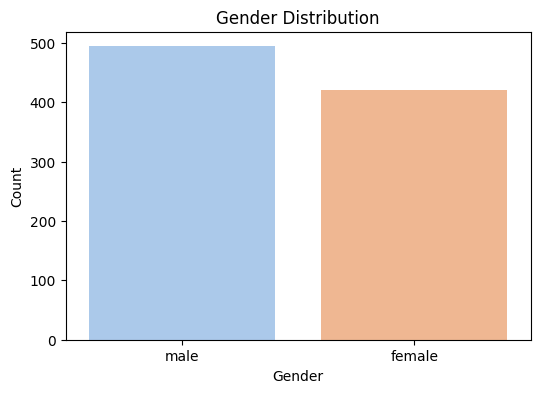

<ipython-input-33-a44c9eeddd00>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='married', palette='muted')


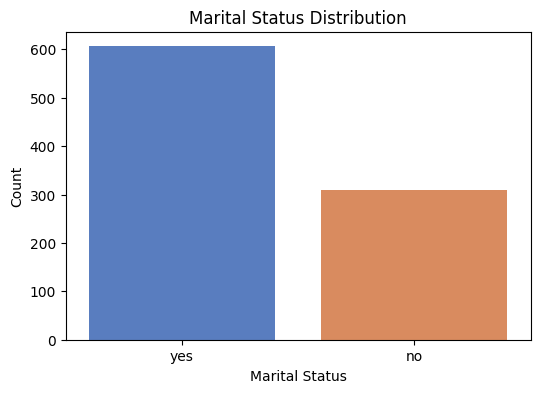

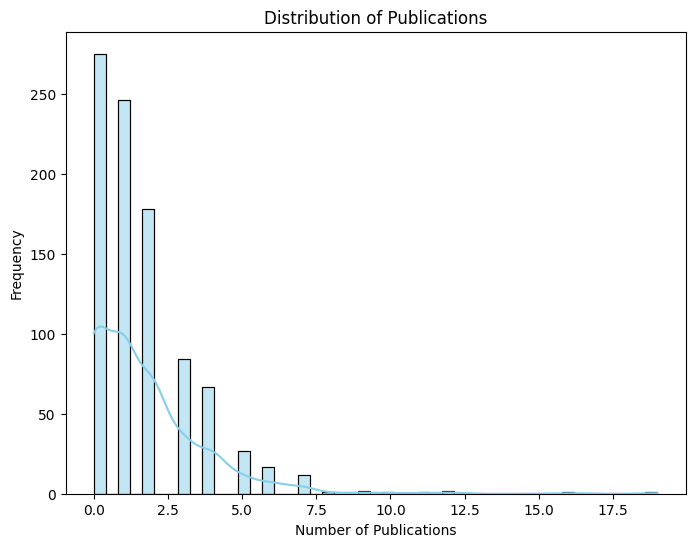

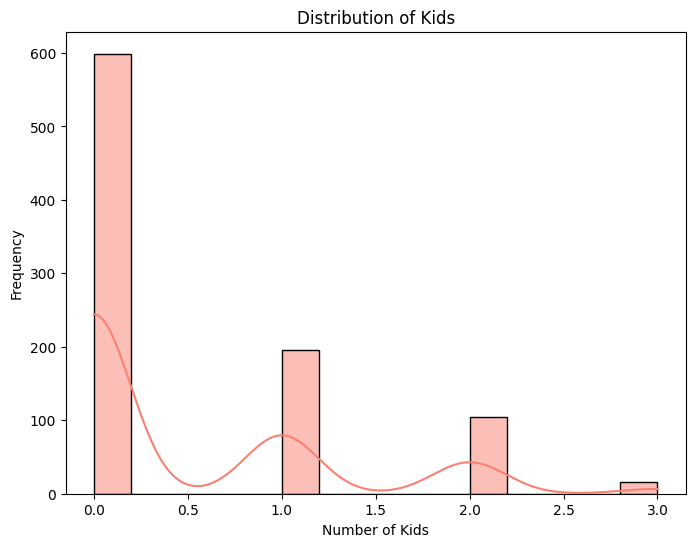

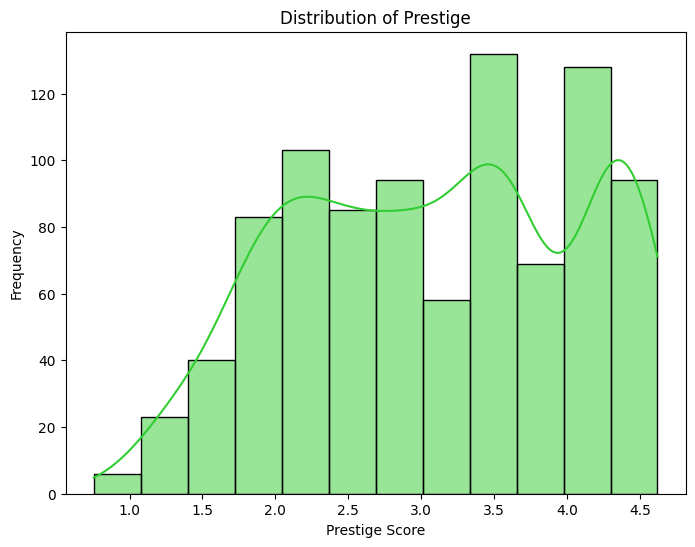

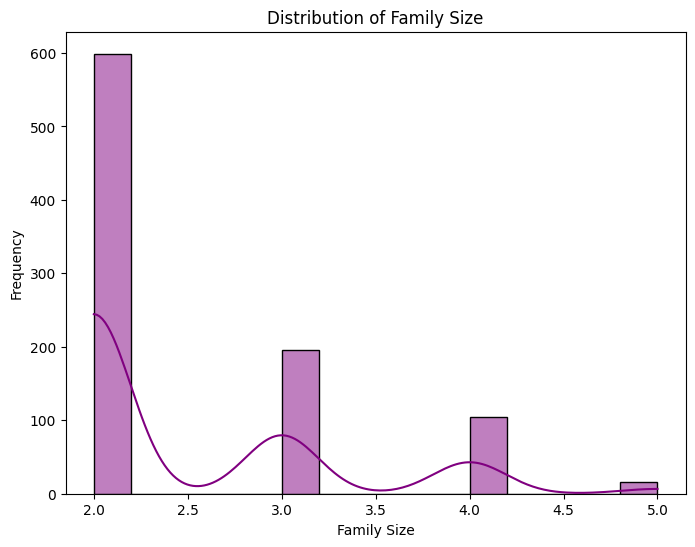

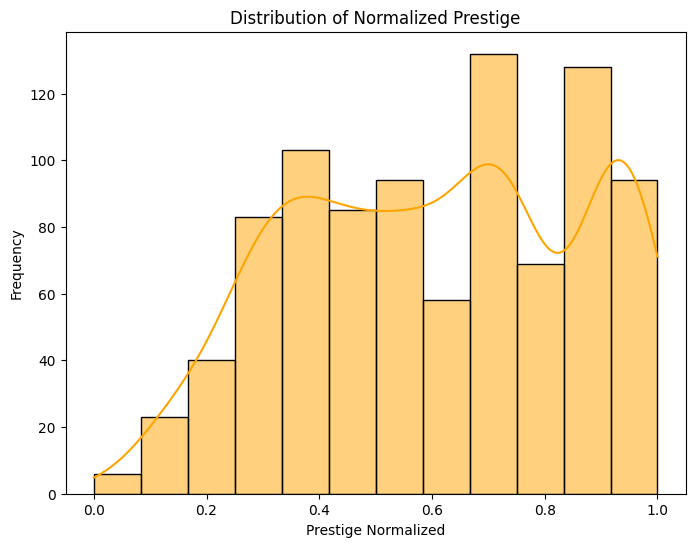

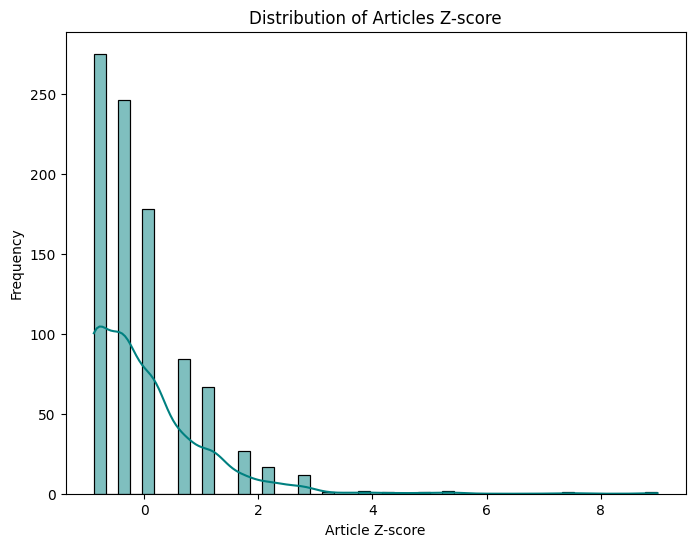

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the DataFrame is named 'df'
# Frequency analysis for categorical variables
print("Frequency of Gender:")
print(df['gender'].value_counts())
print("\nFrequency of Marital Status:")
print(df['married'].value_counts())

# Descriptive statistics for numerical variables
print("\nSummary Statistics:")
print(df.describe())

# Visualizations for univariate analysis

# 1. Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 2. Marital Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='married', palette='muted')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# 3. Distribution of Publications
plt.figure(figsize=(8, 6))
sns.histplot(df['publications'], kde=True, color='skyblue')
plt.title('Distribution of Publications')
plt.xlabel('Number of Publications')
plt.ylabel('Frequency')
plt.show()

# 4. Distribution of Kids
plt.figure(figsize=(8, 6))
sns.histplot(df['kids'], kde=True, color='salmon')
plt.title('Distribution of Kids')
plt.xlabel('Number of Kids')
plt.ylabel('Frequency')
plt.show()

# 5. Distribution of Prestige
plt.figure(figsize=(8, 6))
sns.histplot(df['prestige'], kde=True, color='limegreen')
plt.title('Distribution of Prestige')
plt.xlabel('Prestige Score')
plt.ylabel('Frequency')
plt.show()

# 6. Distribution of Family Size
plt.figure(figsize=(8, 6))
sns.histplot(df['family_size'], kde=True, color='purple')
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

# 7. Distribution of Normalized Prestige
plt.figure(figsize=(8, 6))
sns.histplot(df['prestige_normalized'], kde=True, color='orange')
plt.title('Distribution of Normalized Prestige')
plt.xlabel('Prestige Normalized')
plt.ylabel('Frequency')
plt.show()

# 8. Distribution of Article Z-scores
plt.figure(figsize=(8, 6))
sns.histplot(df['articles_zscore'], kde=True, color='teal')
plt.title('Distribution of Articles Z-score')
plt.xlabel('Article Z-score')
plt.ylabel('Frequency')
plt.show()


Bivariate Analysis

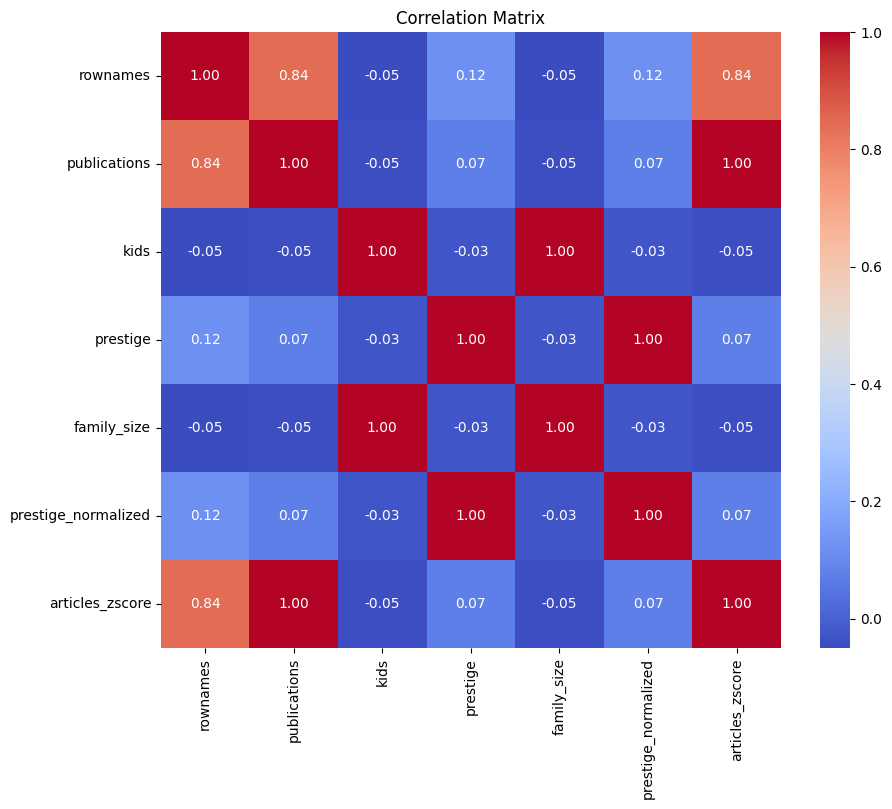

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting the Correlation Matrix for Numerical Variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Multivariate Analysis

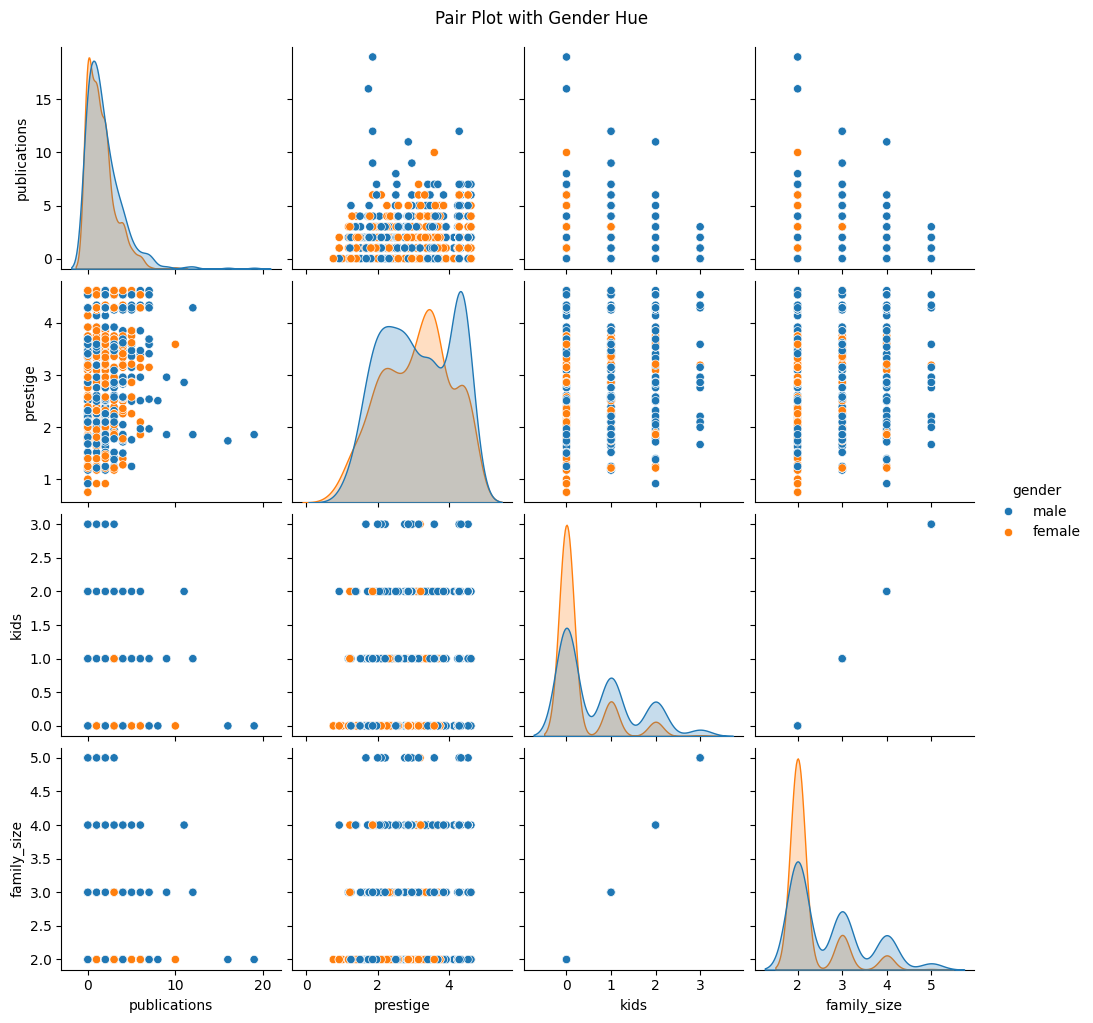

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot with hue for categorical variable (e.g., 'gender')
sns.pairplot(df, vars=['publications', 'prestige', 'kids', 'family_size'], hue='gender', diag_kind='kde')
plt.suptitle('Pair Plot with Gender Hue', y=1.02)
plt.show()


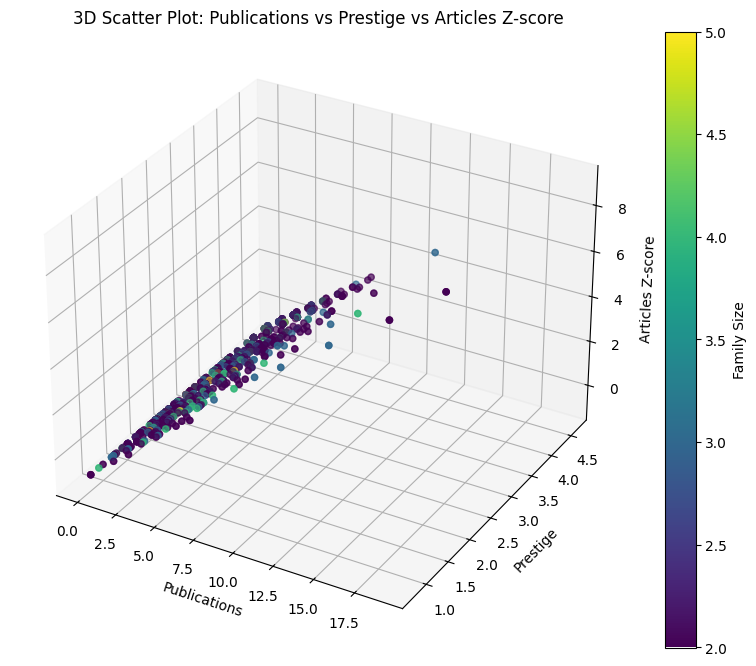

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3D Scatter plot for three continuous variables
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['publications'], df['prestige'], df['articles_zscore'], c=df['family_size'], cmap='viridis')

# Labels and title
ax.set_xlabel('Publications')
ax.set_ylabel('Prestige')
ax.set_zlabel('Articles Z-score')
plt.title('3D Scatter Plot: Publications vs Prestige vs Articles Z-score')
plt.colorbar(ax.scatter(df['publications'], df['prestige'], df['articles_zscore'], c=df['family_size'], cmap='viridis'), label='Family Size')
plt.show()


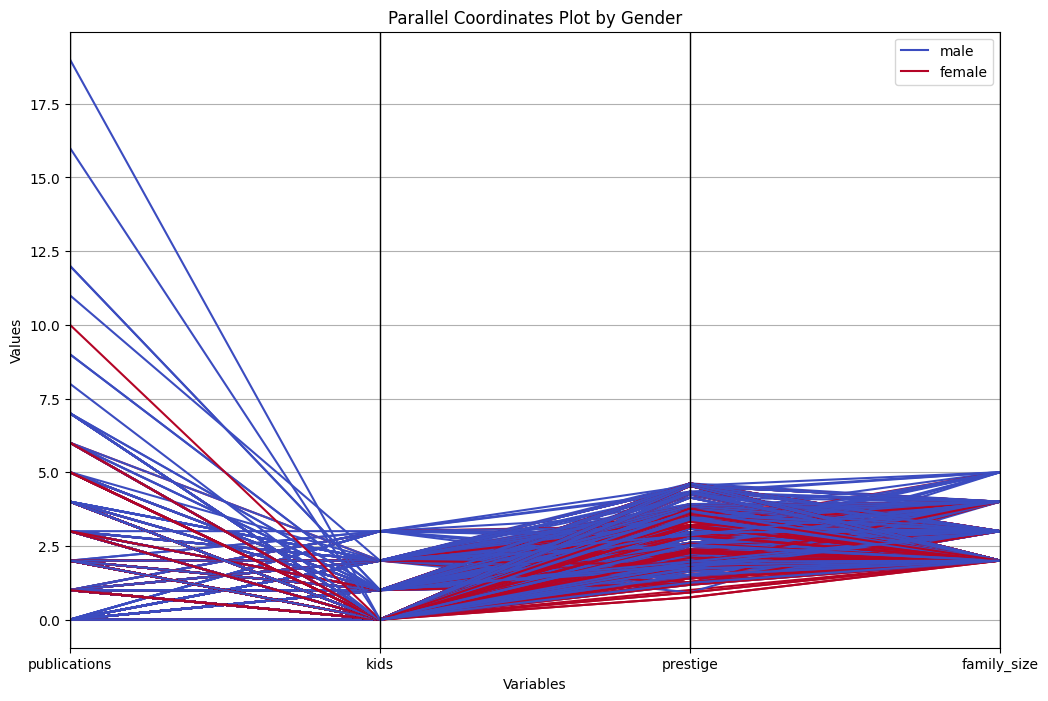

In [ ]:
from pandas.plotting import parallel_coordinates

# Parallel coordinates plot (e.g., by gender)
plt.figure(figsize=(12, 8))
parallel_coordinates(df[['publications', 'kids', 'prestige', 'family_size', 'gender']], class_column='gender', colormap='coolwarm')
plt.title('Parallel Coordinates Plot by Gender')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()


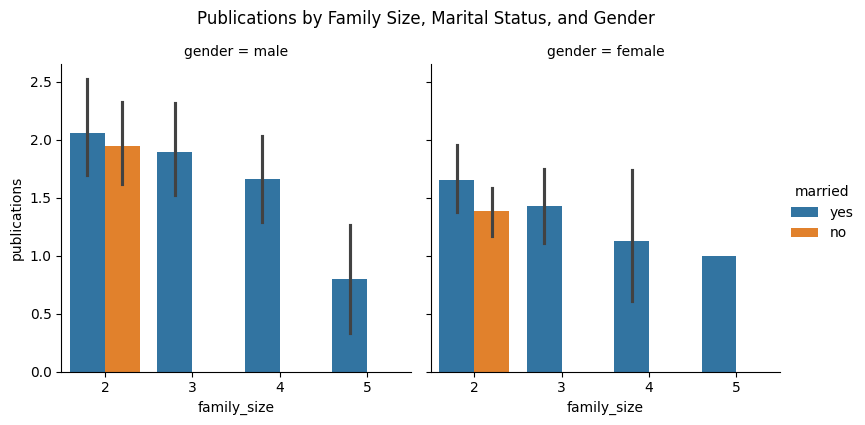

In [ ]:
# Factor plot for publications by family_size and marital status
sns.catplot(data=df, x='family_size', y='publications', hue='married', col='gender', kind='bar', height=4, aspect=1)
plt.suptitle('Publications by Family Size, Marital Status, and Gender', y=1.05)
plt.show()


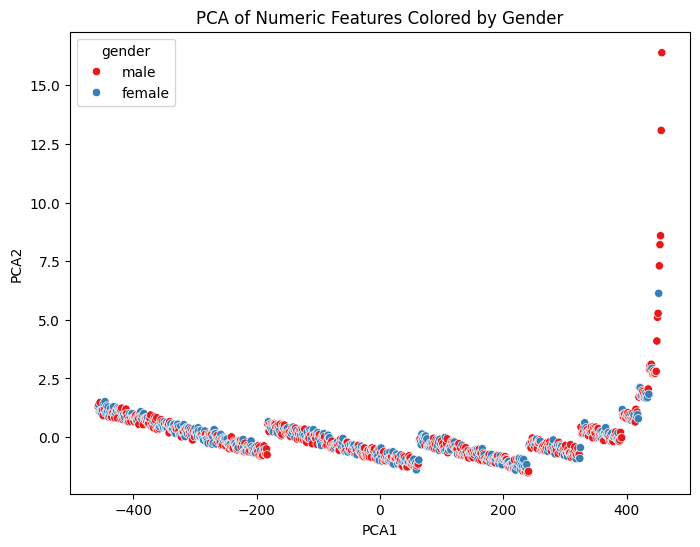

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Selecting numeric features for PCA
numeric_df = df.select_dtypes(include=['float64', 'int64']).dropna()

# Applying PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(numeric_df)
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Adding gender information for color
pca_df['gender'] = df['gender']

# Plotting the PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='gender', palette='Set1')
plt.title('PCA of Numeric Features Colored by Gender')
plt.show()


Time Series Analysis

In [ ]:
# Check for frequency
# Frequency of gender and married status
print(df['gender'].value_counts())
print(df['married'].value_counts())
# Summary of the dataset
print(df.describe())

gender
male      494
female    421
Name: count, dtype: int64
married
yes    606
no     309
Name: count, dtype: int64
         rownames  publications        kids    prestige  family_size  \
count  915.000000    915.000000  915.000000  915.000000   915.000000   
mean   458.000000      1.692896    0.495082    3.103109     2.495082   
std    264.282046      1.926069    0.764880    0.984249     0.764880   
min      1.000000      0.000000    0.000000    0.755000     2.000000   
25%    229.500000      0.000000    0.000000    2.260000     2.000000   
50%    458.000000      1.000000    0.000000    3.150000     2.000000   
75%    686.500000      2.000000    1.000000    3.920000     3.000000   
max    915.000000     19.000000    3.000000    4.620000     5.000000   

       prestige_normalized  articles_zscore  
count           915.000000       915.000000  
mean              0.607532         0.000000  
std               0.254657         1.000547  
min               0.000000        -0.879419  
25% 

<ipython-input-44-d687273899a5>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prestige_ts.index = pd.date_range(start='2023-01-01', periods=len(prestige_ts), freq='M')  # Set frequency as needed


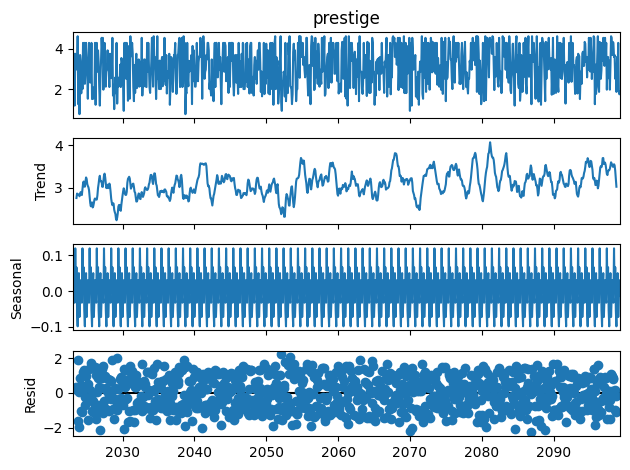

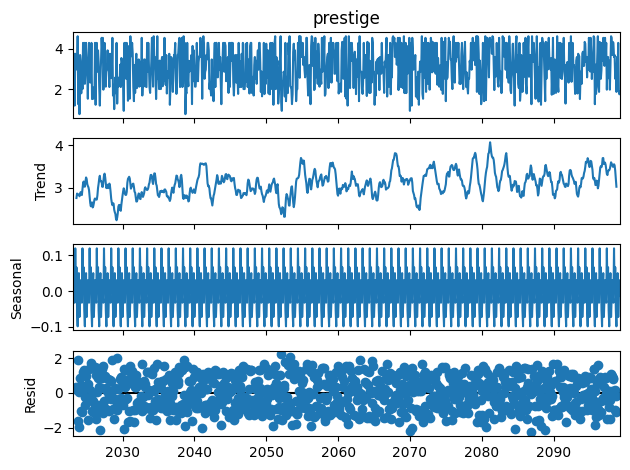

In [ ]:
import statsmodels.api as sm
# Convert the 'prestige' column to a time series if appropriate
prestige_ts = df['prestige']
prestige_ts.index = pd.date_range(start='2023-01-01', periods=len(prestige_ts), freq='M')  # Set frequency as needed
# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(prestige_ts, model='additive', period=12)  # Adjust period as necessary
decomposition.plot()

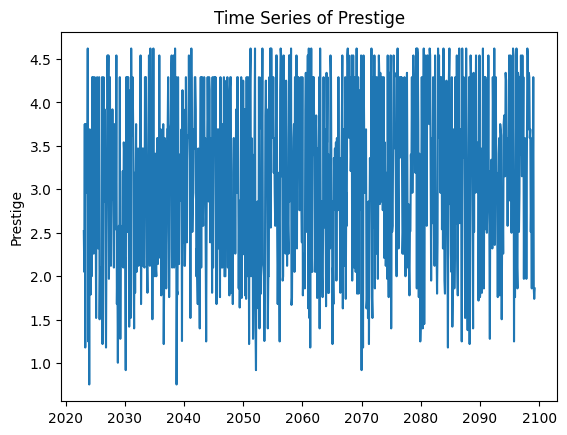

In [ ]:
# Time series plot of prestige
plt.plot(prestige_ts)
plt.title("Time Series of Prestige")
plt.ylabel("Prestige")
plt.show()

1D Statistics Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
# Mean
mean_prestige = df['prestige'].mean()
print("Mean of Prestige:", mean_prestige)
# Median
median_prestige = df['prestige'].median()
print("Median of Prestige:", median_prestige)
# Quantiles
quantiles_prestige = df['prestige'].quantile([0.25, 0.5, 0.75])
print("Quantiles (25th, 50th, 75th) of Prestige:", quantiles_prestige)
# Deciles (10 equal parts)
deciles_prestige = df['prestige'].quantile([i / 10 for i in range(1, 10)])
print("Deciles of Prestige:", deciles_prestige)
# Percentiles (0th to 100th percentile)
percentiles_prestige = df['prestige'].quantile([i / 100 for i in range(1, 100)])
print("Percentiles of Prestige:", percentiles_prestige)
# Range
range_prestige = df['prestige'].max() - df['prestige'].min()
print("Range of Prestige:", range_prestige)
# Interquartile Range (IQR)
iqr_prestige = df['prestige'].quantile(0.75) - df['prestige'].quantile(0.25)
print("Interquartile Range (IQR) of Prestige:", iqr_prestige)
# Interdecile Range (90th percentile - 10th percentile)
interdecile_range_prestige = df['prestige'].quantile(0.9) - df['prestige'].quantile(0.1)
print("Interdecile Range of Prestige:", interdecile_range_prestige)
# Standard Deviation for 'kids'
std_deviation_kids = df['kids'].std()
print("Standard Deviation of Kids:", std_deviation_kids)
# Skewness for 'kids'
skewness_kids = skew(df['kids'])
print("Skewness of Kids:", skewness_kids)
# Kurtosis for 'kids'
kurtosis_kids = kurtosis(df['kids'])
print("Kurtosis of Kids:", kurtosis_kids)


Mean of Prestige: 3.103109264438921
Median of Prestige: 3.150000095367432
Quantiles (25th, 50th, 75th) of Prestige: 0.25    2.26
0.50    3.15
0.75    3.92
Name: prestige, dtype: float64
Deciles of Prestige: 0.1    1.78
0.2    2.10
0.3    2.50
0.4    2.86
0.5    3.15
0.6    3.47
0.7    3.69
0.8    4.29
0.9    4.34
Name: prestige, dtype: float64
Percentiles of Prestige: 0.01    1.180
0.02    1.250
0.03    1.322
0.04    1.400
0.05    1.520
        ...  
0.95    4.540
0.96    4.540
0.97    4.620
0.98    4.620
0.99    4.620
Name: prestige, Length: 99, dtype: float64
Range of Prestige: 3.8649998903274536
Interquartile Range (IQR) of Prestige: 1.660000085830688
Interdecile Range of Prestige: 2.56000018119812
Standard Deviation of Kids: 0.764880011508257
Skewness of Kids: 1.3742496577073526
Kurtosis of Kids: 0.8949643370328428


In [ ]:
# Frequency Distribution
frequency_distribution = df['prestige'].value_counts().sort_index()
print("Frequency Distribution of Prestige:\n", frequency_distribution)

Frequency Distribution of Prestige:
 prestige
0.755      2
0.920      3
1.005      1
1.180      5
1.220      6
        ... 
4.250      8
4.290    114
4.340     10
4.540     49
4.620     35
Name: count, Length: 83, dtype: int64


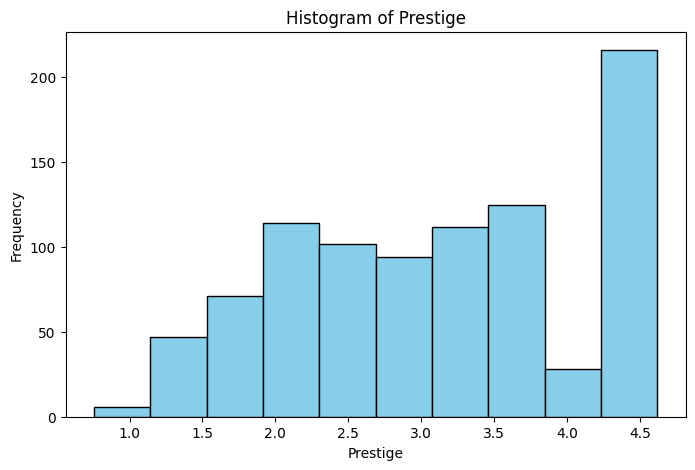

In [ ]:
# Histogram
plt.figure(figsize=(8, 5))
plt.hist(df['prestige'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Prestige")
plt.xlabel("Prestige")
plt.ylabel("Frequency")
plt.show()


Relative Frequency of Prestige:
 prestige
0.755    0.002186
0.920    0.003279
1.005    0.001093
1.180    0.005464
1.220    0.006557
           ...   
4.250    0.008743
4.290    0.124590
4.340    0.010929
4.540    0.053552
4.620    0.038251
Name: count, Length: 83, dtype: float64
Cumulative Frequency of Prestige:
 prestige
0.755      2
0.920      5
1.005      6
1.180     11
1.220     17
        ... 
4.250    707
4.290    821
4.340    831
4.540    880
4.620    915
Name: count, Length: 83, dtype: int64


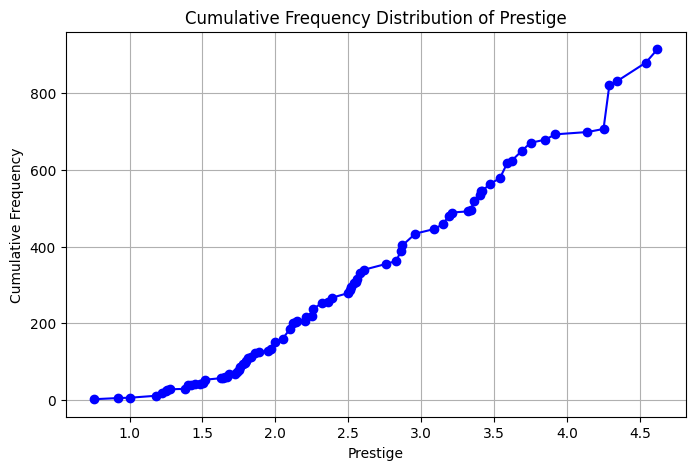

In [ ]:
# Relative Frequency
relative_frequency = frequency_distribution / len(df)
print("Relative Frequency of Prestige:\n", relative_frequency)
# Cumulative Frequency
cumulative_frequency = frequency_distribution.cumsum()
print("Cumulative Frequency of Prestige:\n", cumulative_frequency)
# Cumulative Frequency Plot
plt.figure(figsize=(8, 5))
plt.plot(cumulative_frequency, marker='o', color='blue')
plt.title("Cumulative Frequency Distribution of Prestige")
plt.xlabel("Prestige")
plt.ylabel("Cumulative Frequency")
plt.grid()
plt.show()

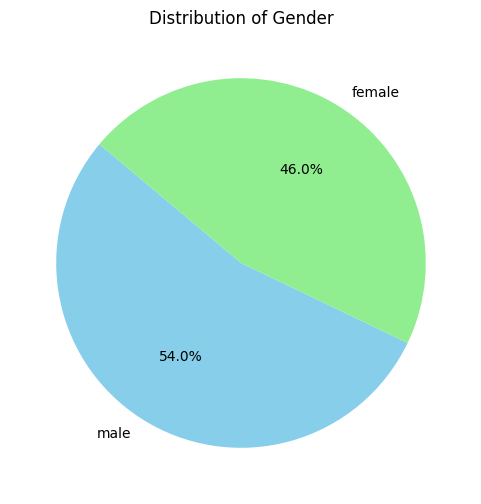

In [ ]:
# Pie chart for gender
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title("Distribution of Gender")
plt.show()

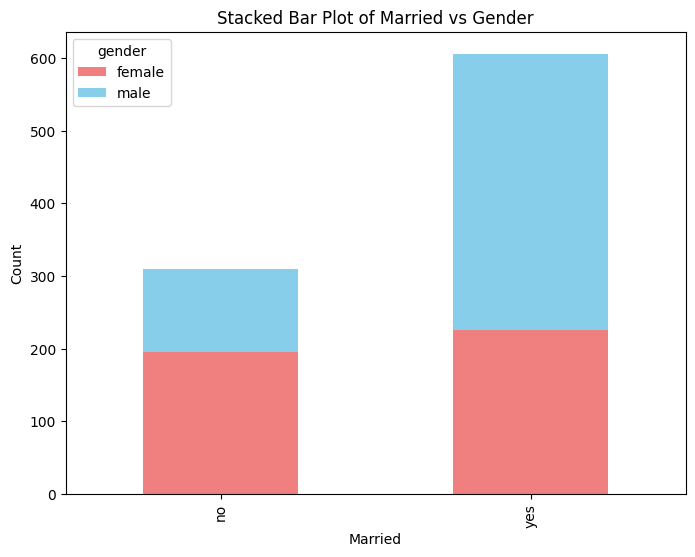

In [ ]:
# Stacked bar plot for married and gender
married_gender_counts = df.groupby(['married', 'gender']).size().unstack()
married_gender_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'], figsize=(8, 6))
plt.title("Stacked Bar Plot of Married vs Gender")
plt.xlabel("Married")
plt.ylabel("Count")
plt.show()

2 D Visualizations

/usr/local/lib/python3.10/dist-packages/seaborn/_core/data.py:265: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  frame = pd.DataFrame(plot_data)


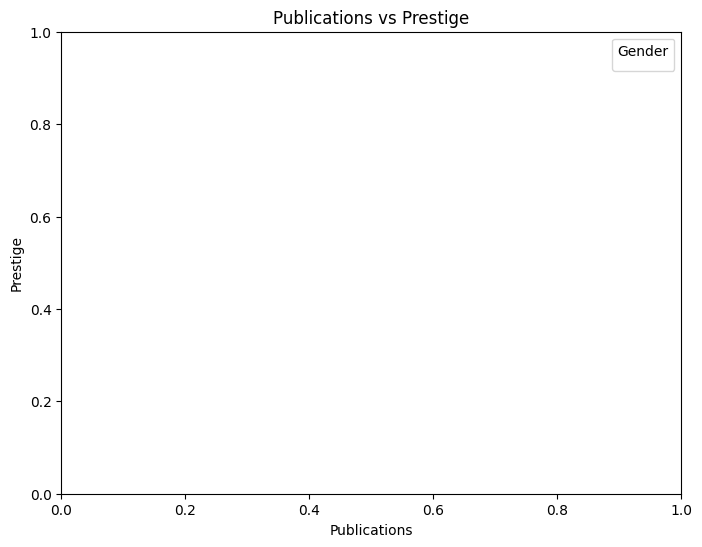

<ipython-input-52-1308890cc491>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='married', y='publications', palette='pastel')


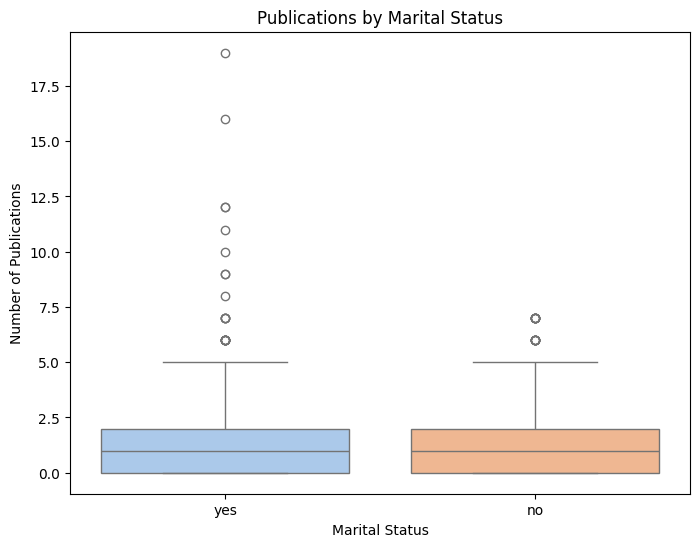

<ipython-input-52-1308890cc491>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='family_size', y='prestige', estimator='mean', ci=None, palette='muted')
<ipython-input-52-1308890cc491>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='family_size', y='prestige', estimator='mean', ci=None, palette='muted')


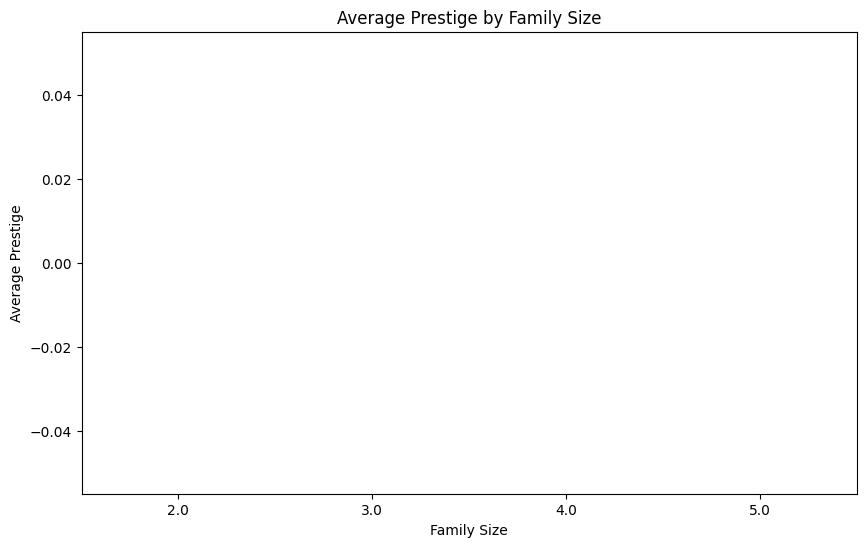

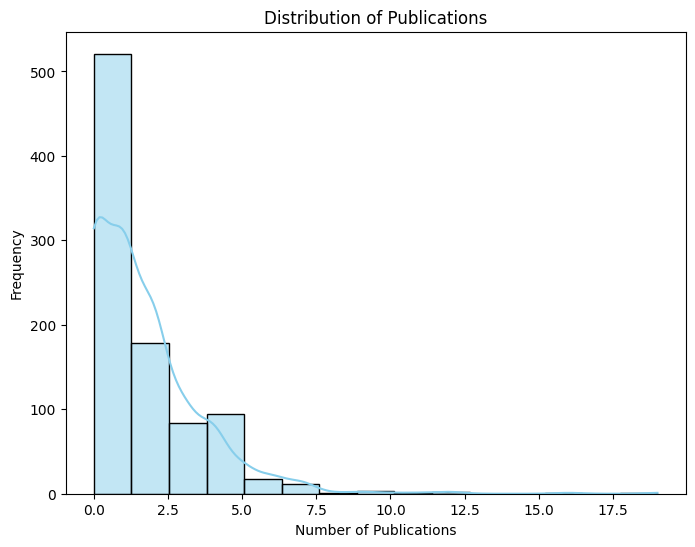

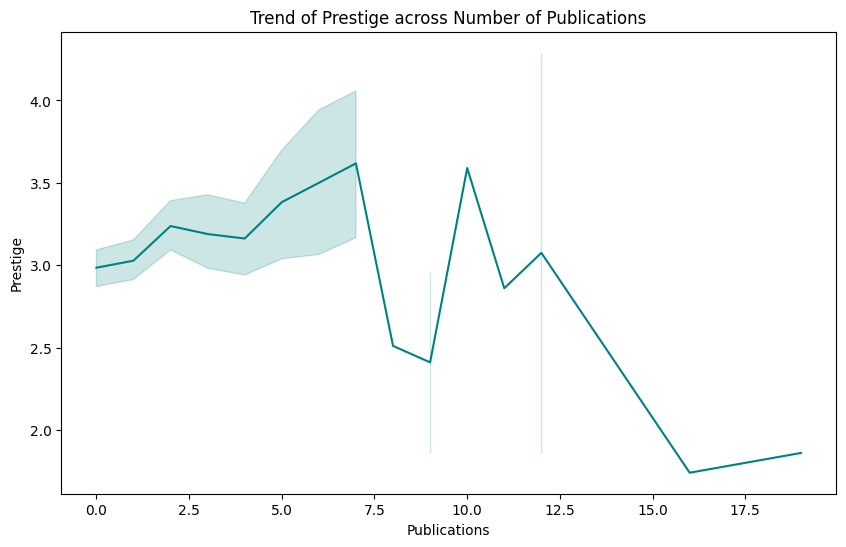

<ipython-input-52-1308890cc491>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='gender', y='prestige', palette='Set2')


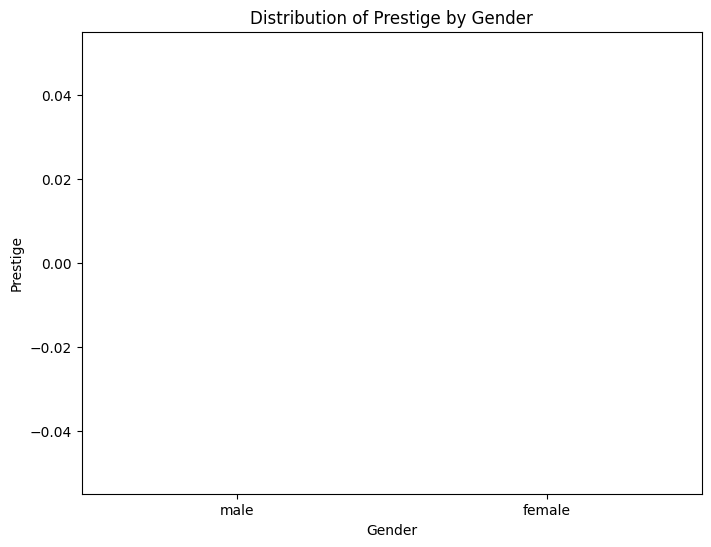

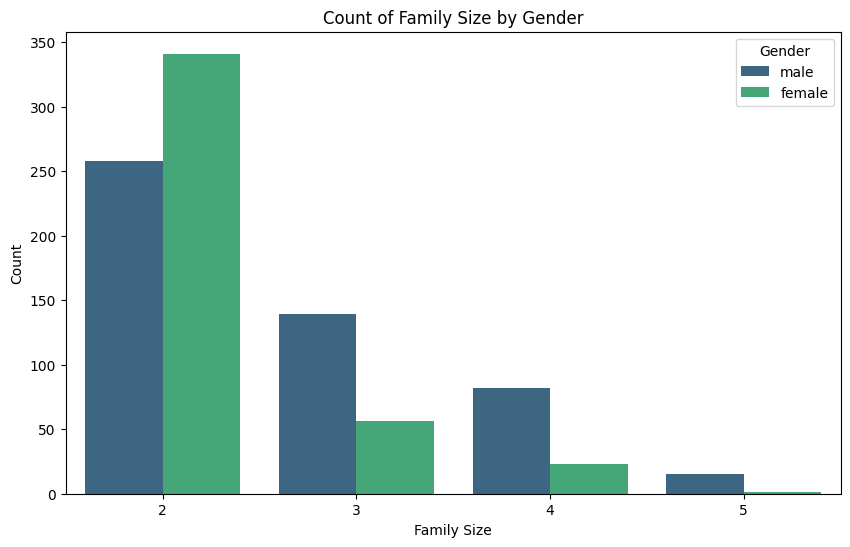

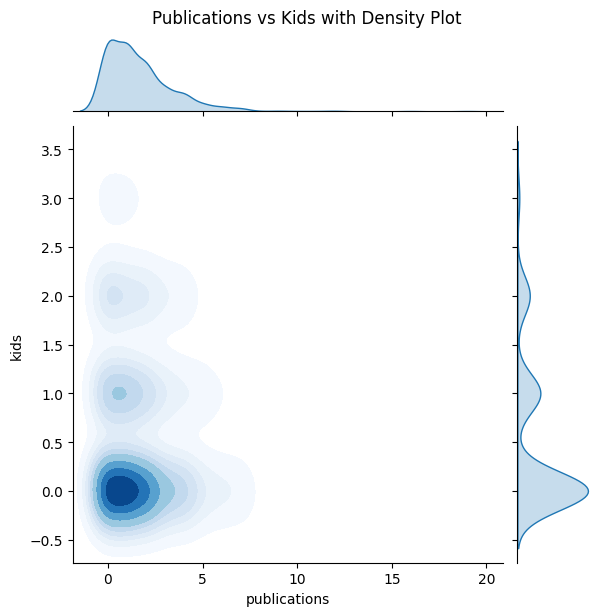

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame (assuming it's already named df)

# 1. Scatter Plot: Relationship between Publications and Prestige
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='publications', y='prestige', hue='gender', palette='Set1')
plt.title('Publications vs Prestige')
plt.xlabel('Publications')
plt.ylabel('Prestige')
plt.legend(title='Gender')
plt.show()

# 2. Box Plot: Publications by Marital Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='married', y='publications', palette='pastel')
plt.title('Publications by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Publications')
plt.show()

# 3. Bar Plot: Average Prestige by Family Size
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='family_size', y='prestige', estimator='mean', ci=None, palette='muted')
plt.title('Average Prestige by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Average Prestige')
plt.show()

# 4. Histogram: Distribution of Publications
plt.figure(figsize=(8, 6))
sns.histplot(df['publications'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Publications')
plt.xlabel('Number of Publications')
plt.ylabel('Frequency')
plt.show()

# 5. Line Plot: Trend of Prestige across Number of Publications
# (Assuming some logical order to publications, like sorted data by publications)
df_sorted = df.sort_values(by='publications')  # Sorting by publications if needed
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x='publications', y='prestige', color='teal')
plt.title('Trend of Prestige across Number of Publications')
plt.xlabel('Publications')
plt.ylabel('Prestige')
plt.show()

# 6. Violin Plot: Distribution of Prestige by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='gender', y='prestige', palette='Set2')
plt.title('Distribution of Prestige by Gender')
plt.xlabel('Gender')
plt.ylabel('Prestige')
plt.show()

# 7. Count Plot: Count of Family Size by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='family_size', hue='gender', palette='viridis')
plt.title('Count of Family Size by Gender')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# 8. Joint Plot: Publications vs. Kids with KDE
sns.jointplot(data=df, x='publications', y='kids', kind='kde', fill=True, cmap="Blues")
plt.suptitle('Publications vs Kids with Density Plot', y=1.02)
plt.show()


N D Visualizaions

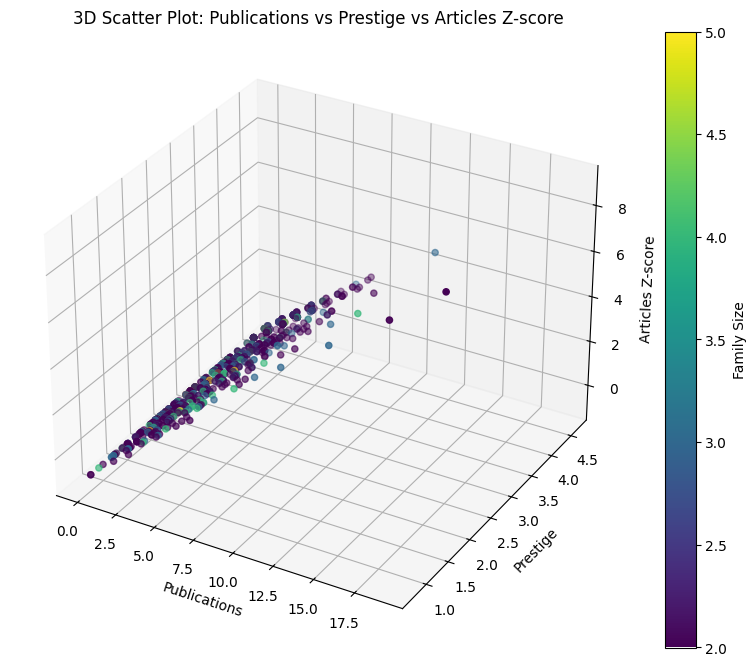

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3D Scatter plot for three continuous variables
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['publications'], df['prestige'], df['articles_zscore'], c=df['family_size'], cmap='viridis')

# Labels and title
ax.set_xlabel('Publications')
ax.set_ylabel('Prestige')
ax.set_zlabel('Articles Z-score')
plt.title('3D Scatter Plot: Publications vs Prestige vs Articles Z-score')
plt.colorbar(sc, label='Family Size')
plt.show()


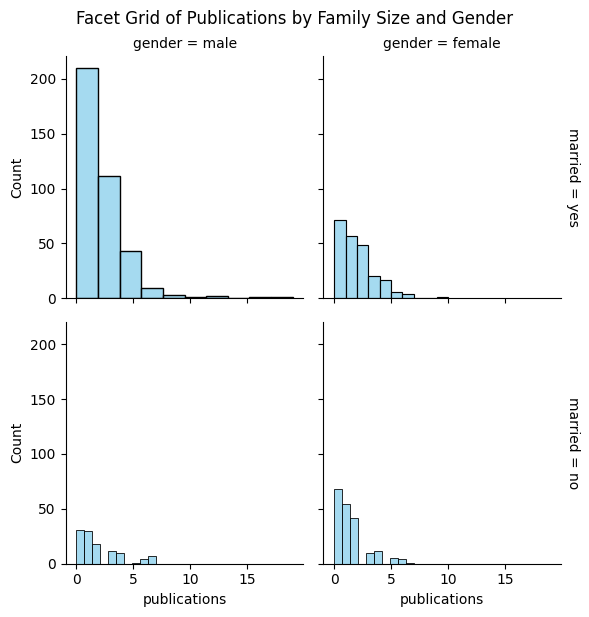

In [ ]:
# Facet Grid of publications by family_size, separated by gender
g = sns.FacetGrid(df, col="gender", row="married", margin_titles=True)
g.map(sns.histplot, "publications", bins=10, color="skyblue")
g.fig.suptitle('Facet Grid of Publications by Family Size and Gender', y=1.02)
plt.show()


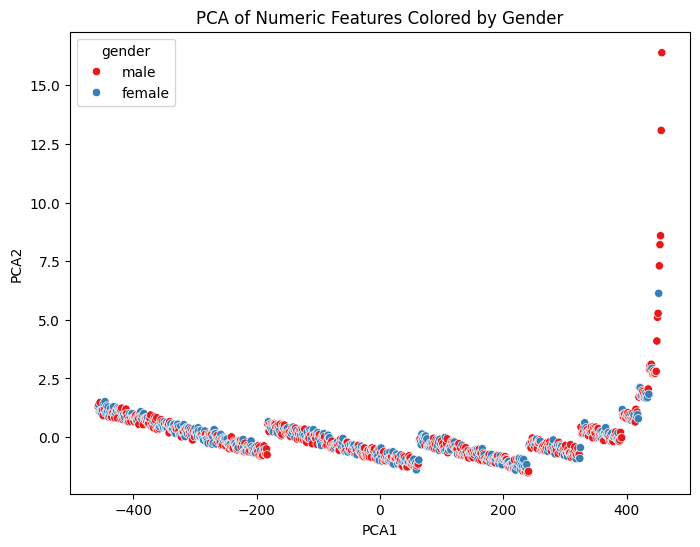

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

# Selecting numeric features for PCA
numeric_df = df.select_dtypes(include=['float64', 'int64']).dropna()

# Applying PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(numeric_df)
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Adding gender information for color
pca_df['gender'] = df['gender']

# Plotting the PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='gender', palette='Set1')
plt.title('PCA of Numeric Features Colored by Gender')
plt.show()


**KMeans**

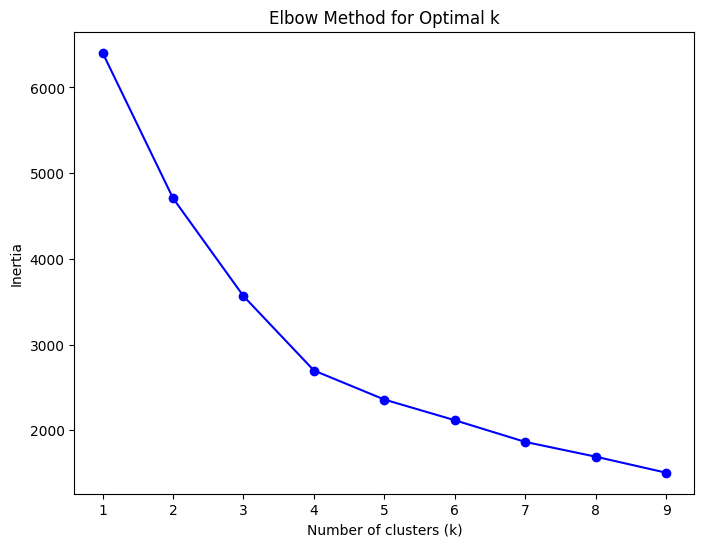

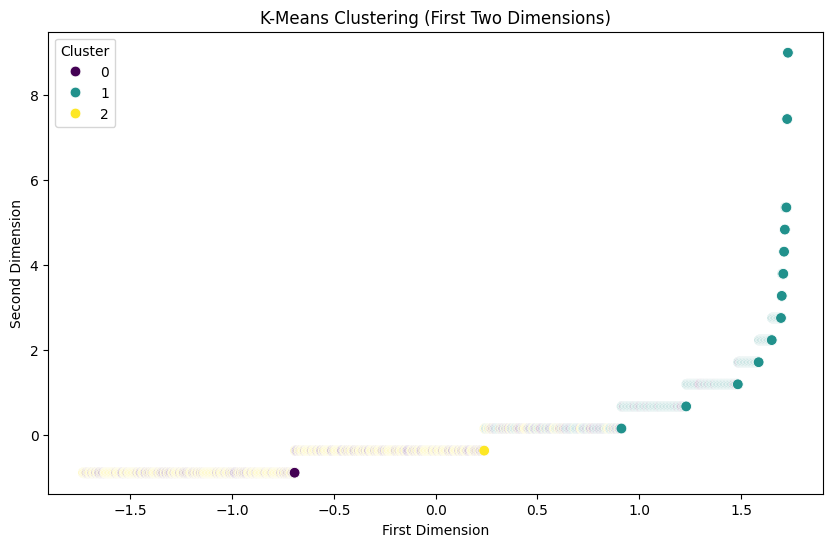

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (assuming df is loaded and has only numerical columns)
# If your dataset has categorical columns, select only the numerical columns for clustering
df_numeric = df.select_dtypes(include=[np.number])

# Standardizing the data (important for K-Means to ensure each feature contributes equally)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Choosing the number of clusters (elbow method)
inertia = []
K = range(1, 10)  # Test for clusters 1 through 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fitting KMeans with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Adding cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualizing Clusters (for example with the first two principal components)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df_scaled[:, 0], y=df_scaled[:, 1], hue='Cluster', palette='viridis', s=60)
plt.title('K-Means Clustering (First Two Dimensions)')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(title='Cluster')
plt.show()


Hierarchical Clustering

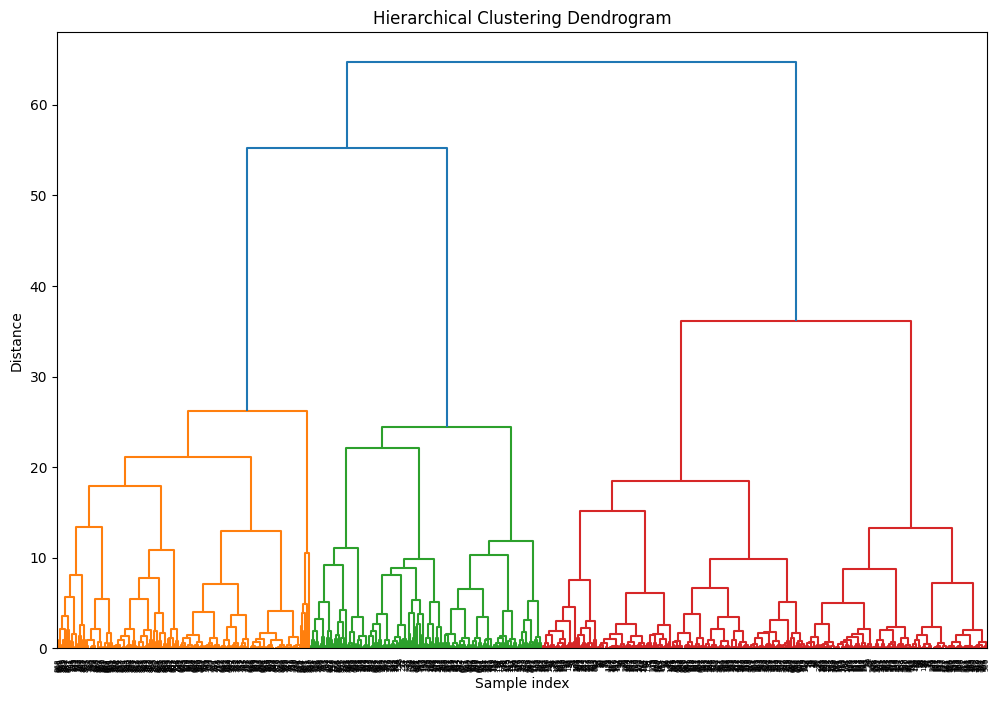

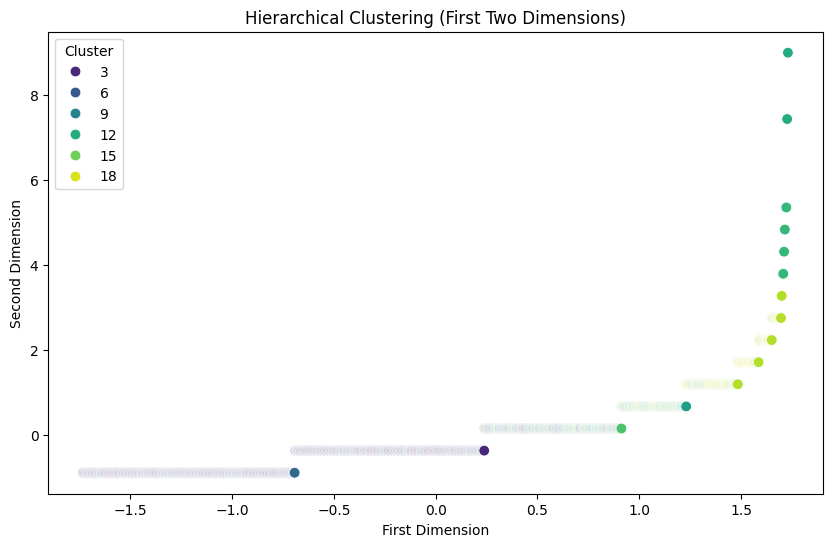

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (assuming df is loaded and has only numerical columns)
# If your dataset has categorical columns, select only the numerical columns for clustering
df_numeric = df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Perform hierarchical/agglomerative clustering using linkage
# "ward" minimizes the variance of the clusters being merged (other methods: "single", "complete", "average")
linked = linkage(df_scaled, method='ward')

# Plot the dendrogram to visualize the hierarchy
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Set a threshold to determine clusters (e.g., cutting the dendrogram at a certain level)
# You can adjust the threshold or use n_clusters
max_distance = 10  # Adjust as needed based on dendrogram
clusters = fcluster(linked, max_distance, criterion='distance')

# Alternatively, specify a fixed number of clusters
# clusters = fcluster(linked, t=3, criterion='maxclust')  # For a fixed number of clusters (e.g., 3)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize clusters (for example with the first two principal components)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['Cluster'], palette='viridis', s=60)
plt.title('Hierarchical Clustering (First Two Dimensions)')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend(title='Cluster')
plt.show()


*Model* Training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming the dataframe is already loaded as 'df'

# Step 1: Prepare the data
# Assuming 'married' is the target variable and others are features (modify as needed)
X = df.drop(columns=['married', 'rownames'])  # Dropping non-numeric columns like 'rownames'
y = df['married']  # Target variable (assuming it's 'married')

# Convert categorical variables to numeric (if any)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical columns to one-hot encoded variables

# Step 2: Standardizing the data (important for some models like KMeans, SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Initialize the model (RandomForestClassifier in this case)
model = RandomForestClassifier(random_state=42)

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

          no       0.58      0.66      0.62        58
         yes       0.83      0.78      0.81       125

    accuracy                           0.74       183
   macro avg       0.71      0.72      0.71       183
weighted avg       0.75      0.74      0.75       183

Confusion Matrix:
[[38 20]
 [27 98]]
